In [91]:
#importing neccesary packages
import datetime
import numpy as npy
import pandas as pds
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [92]:
#import dataset 
Dataset= pds.read_csv(r'C:\Users\harsh\OneDrive\Desktop\SeoulBikeData.csv',encoding = 'unicode_escape')


**DATA PREPARATION**

In [93]:
#First look of dataset
Dataset.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [94]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [95]:
#renaming Attributes
Dataset.rename({"Temperature(°C)": "Temperature",  
                      "Functioning Day":"Functioning_Day",
           "Humidity(%)": "Humidity",  
           "Wind speed (m/s)": "Wind_speed",
           "Visibility (10m)": "Visibility",
           "Dew point temperature(°C)": "Dew_point_temperature",
           "Solar Radiation (MJ/m2)": "Solar_Radiation",
           "Snowfall (cm)": "Snowfall",
           "Rainfall(mm)": "Rainfall",
           "Rented Bike Count": "Rented_Bike_Count"},  
          axis = "columns", inplace = True) 
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 821.3+ 

In [96]:
#Checking the nullvalues in Dataset
Dataset.isnull().sum()


Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

In [97]:
#Checking the duplicate values in Dataset
print("Number of Duplicate values:",Dataset.duplicated().sum())

Number of Duplicate values: 0


<AxesSubplot:>

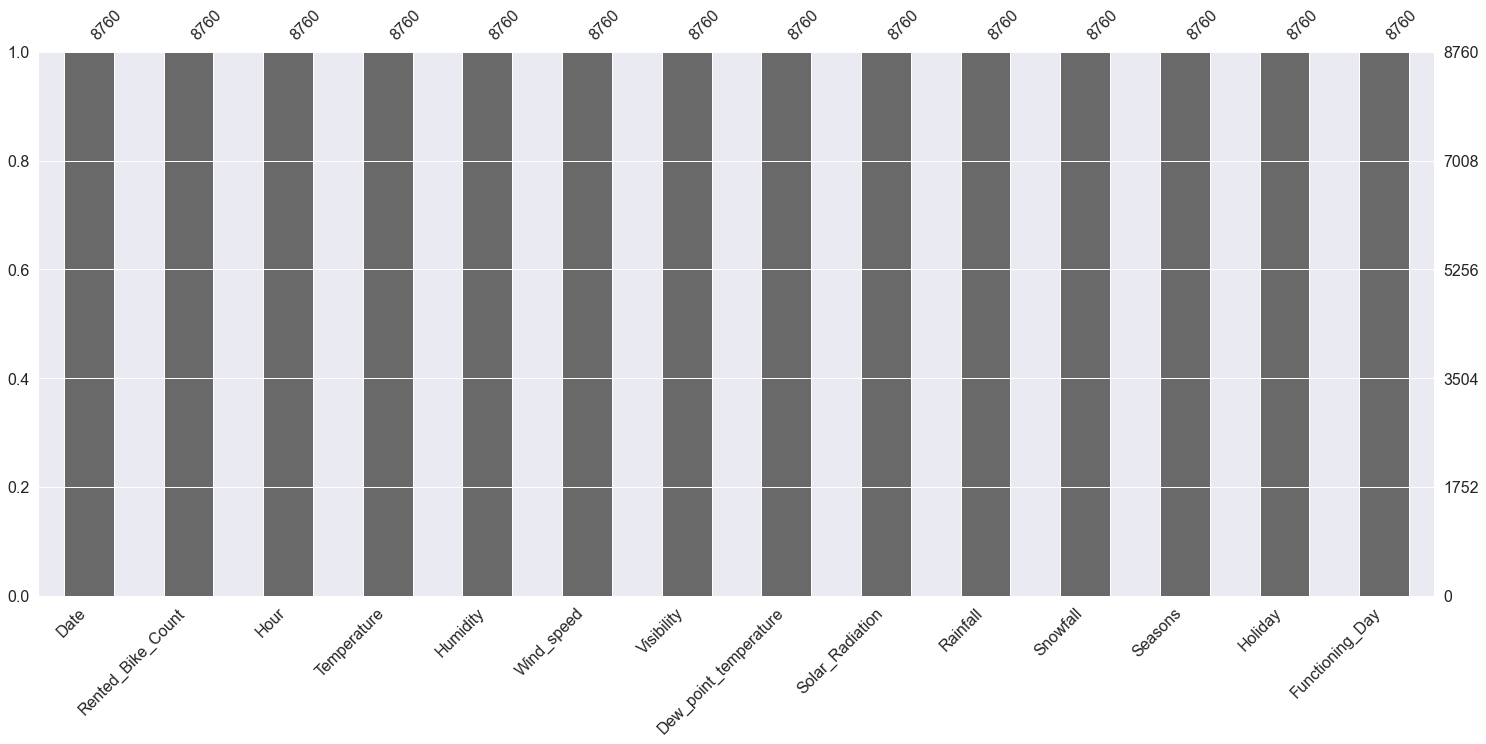

In [98]:
msno.bar(Dataset)

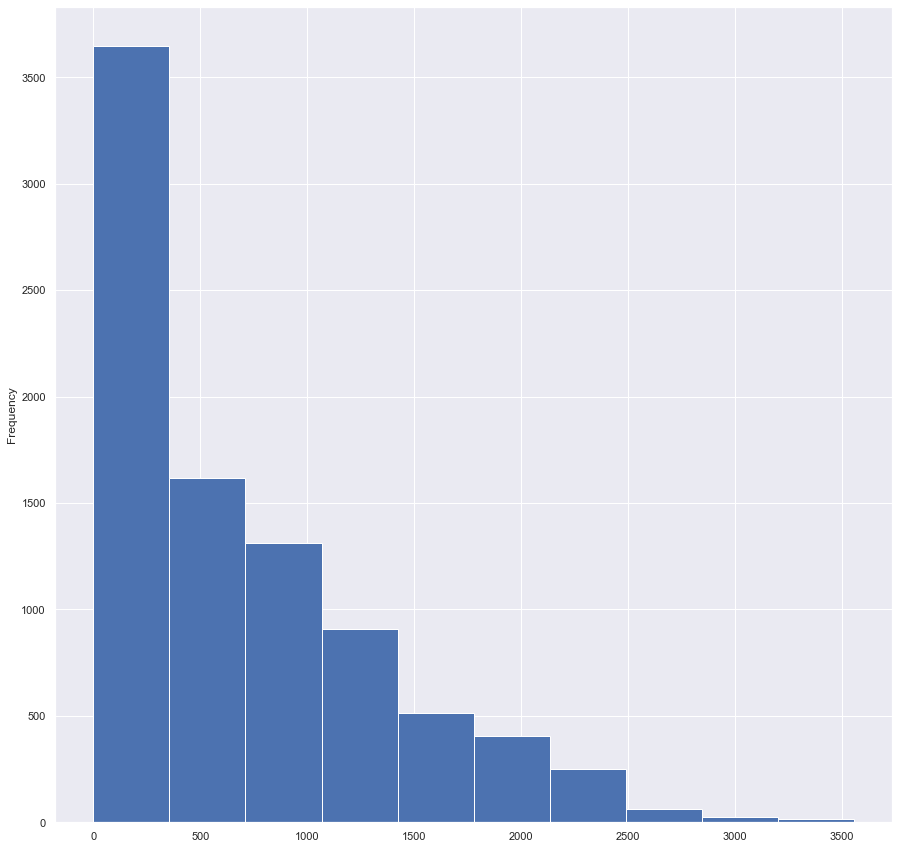

In [99]:
Dataset['Rented_Bike_Count'].plot(kind='hist');

<AxesSubplot:xlabel='Rented_Bike_Count'>

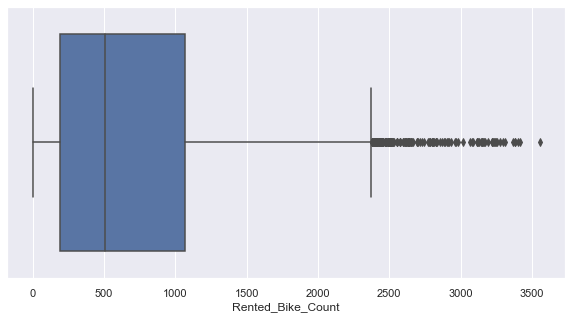

In [122]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x=Dataset['Rented_Bike_Count'])

**EXPLORATORY DATA ANALYSIS(EDA)**

In [101]:
#splitting dataset into training and testing dataset
training_data , testing_data = train_test_split(Dataset,test_size=0.25,random_state=25)
print ("Number of training dataset entries:",training_data.shape[0])
print ("Number of testing dataset entries:",testing_data.shape[0])
#Splitting the Date column into date month and year separately
training_data['Day'] = pds.DatetimeIndex(training_data['Date'], dayfirst=True).day_name()
training_data['month'] = pds.DatetimeIndex(training_data['Date'], dayfirst=True).month_name()
training_data['year'] = pds.DatetimeIndex(training_data['Date'], dayfirst=True).year



Number of training dataset entries: 6570
Number of testing dataset entries: 2190


**VISUALIZING CATEGORICAL DATA**

Text(0, 0.5, 'Frequency')

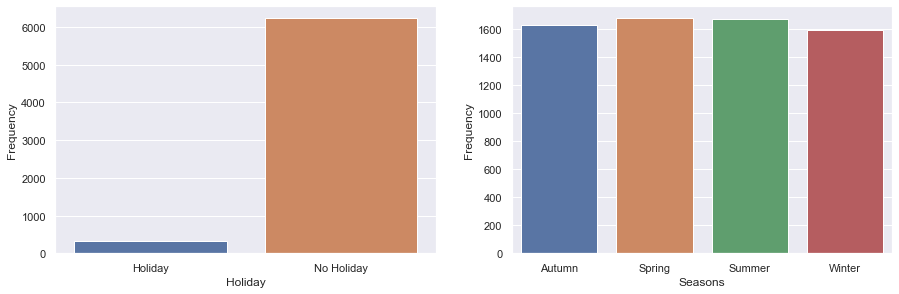

In [102]:
Holiday = pds.DataFrame(training_data.groupby('Holiday').agg({'Rented_Bike_Count':'count'}))
Season= pds.DataFrame(training_data.groupby('Seasons').agg({'Rented_Bike_Count':'count'}))
fig,size = plt.subplots(1,1,figsize=(15,10))
ax1=plt.subplot(2, 2,1)
sns.barplot(x=Holiday.index, y = Holiday['Rented_Bike_Count'])
ax1.set_ylabel("Frequency")
ax1=plt.subplot(2, 2,2)
sns.barplot(x=Season.index, y = Season['Rented_Bike_Count'])
ax1.set_ylabel("Frequency")


Text(0, 0.5, 'Rented Bike Count')

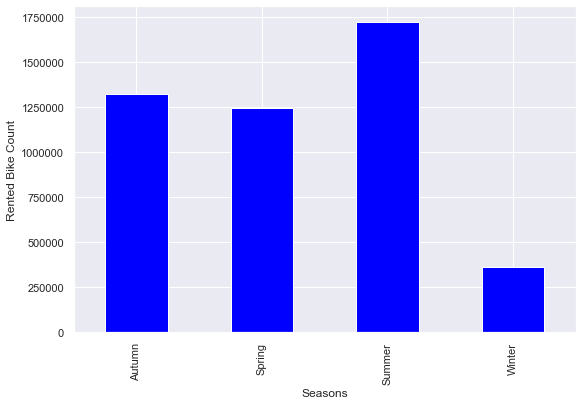

In [103]:
plt.figure(figsize=(9,6))
training_data.groupby('Seasons')['Rented_Bike_Count'].sum().plot.bar(color='blue')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')


Text(0, 0.5, 'Rented Bike Count')

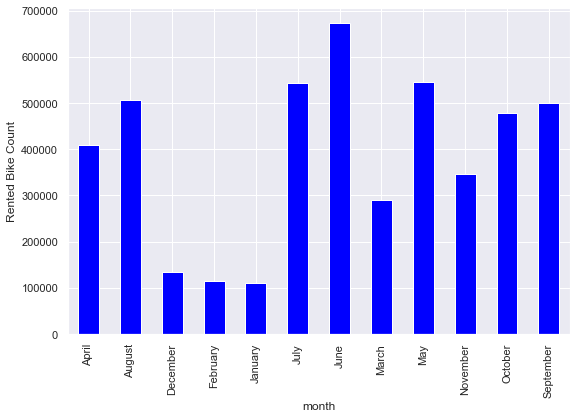

In [104]:
plt.figure(figsize=(9,6))
training_data.groupby('month')['Rented_Bike_Count'].sum().plot.bar(color='blue')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')


Text(0, 0.5, 'Rented Bike Count')

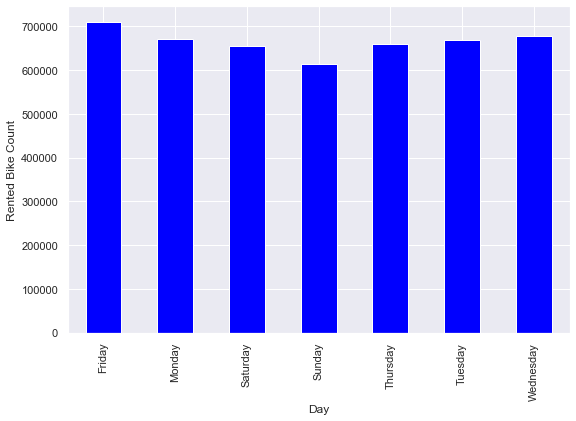

In [105]:
plt.figure(figsize=(9,6))
training_data.groupby('Day')['Rented_Bike_Count'].sum().plot.bar(color='blue')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')

Text(0, 0.5, 'Rented Bike Count')

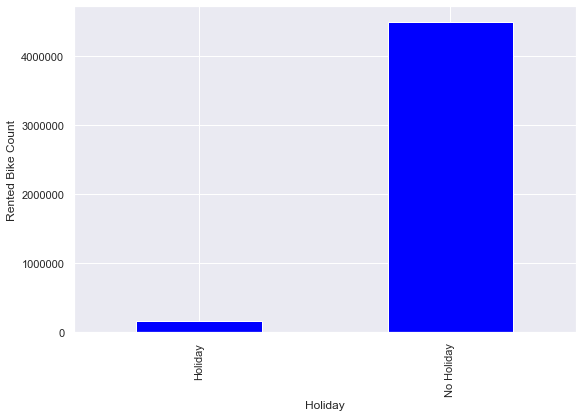

In [106]:
plt.figure(figsize=(9,6))
training_data.groupby('Holiday')['Rented_Bike_Count'].sum().plot.bar(color='blue')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')


Text(0, 0.5, 'Rented Bike Count')

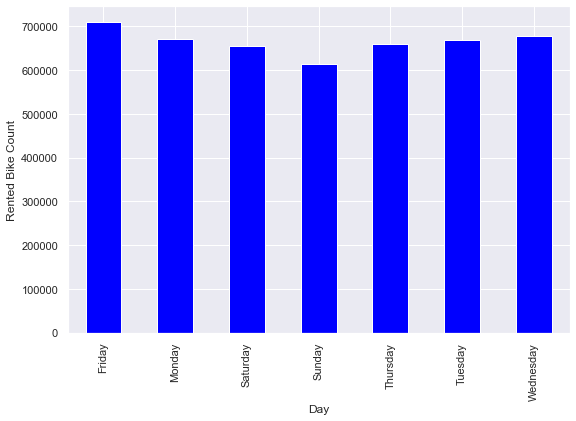

In [107]:
plt.figure(figsize=(9,6))
training_data.groupby('Day')['Rented_Bike_Count'].sum().plot.bar(color='blue')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')

**VISUALIZING NUMERICAL DATA**

Text(0, 0.5, 'Rented Bike Count')

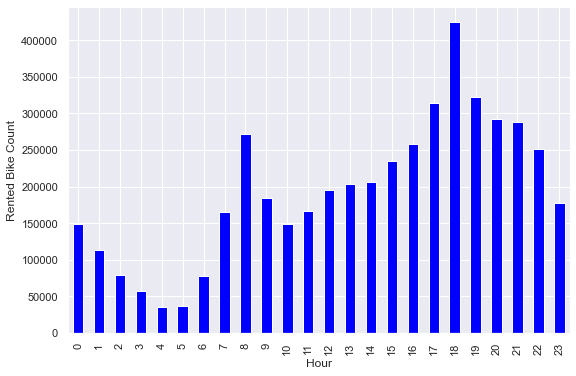

In [108]:
plt.figure(figsize=(9,6))
training_data.groupby('Hour')['Rented_Bike_Count'].sum().plot.bar(color='blue')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')

Text(0, 0.5, 'Rented Bike Count')

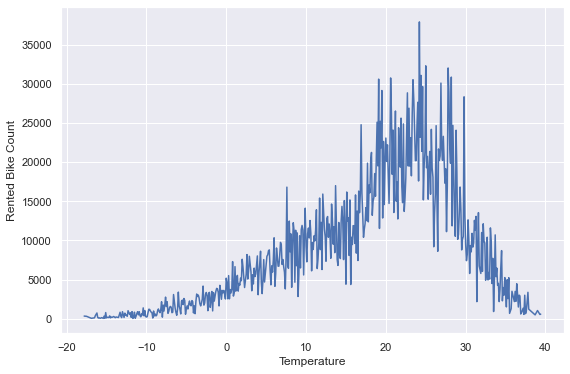

In [109]:
plt.figure(figsize=(9,6))
training_data.groupby('Temperature')['Rented_Bike_Count'].sum().plot()

plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')

Text(0, 0.5, 'Rented Bike Count')

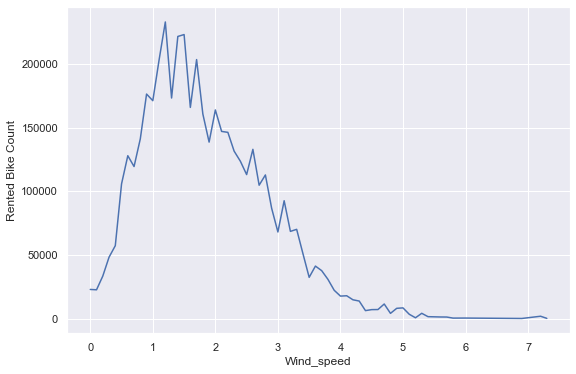

In [110]:
plt.figure(figsize=(9,6))
training_data.groupby('Wind_speed')['Rented_Bike_Count'].sum().plot()

plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')

Text(0, 0.5, 'Rented Bike Count')

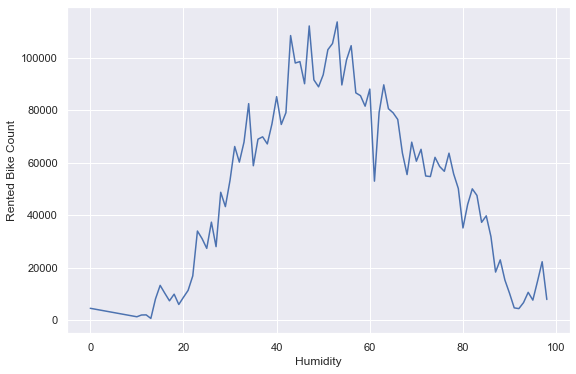

In [111]:
plt.figure(figsize=(9,6))
training_data.groupby('Humidity')['Rented_Bike_Count'].sum().plot()

plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')

Text(0, 0.5, 'Rented Bike Count')

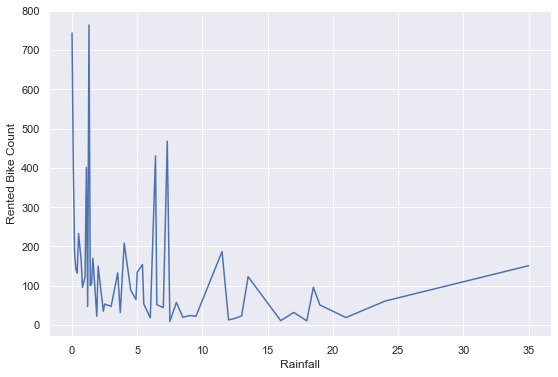

In [112]:
plt.figure(figsize=(9,6))
training_data.groupby('Rainfall')['Rented_Bike_Count'].mean().plot()

plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')

Text(0, 0.5, 'Rented Bike Count')

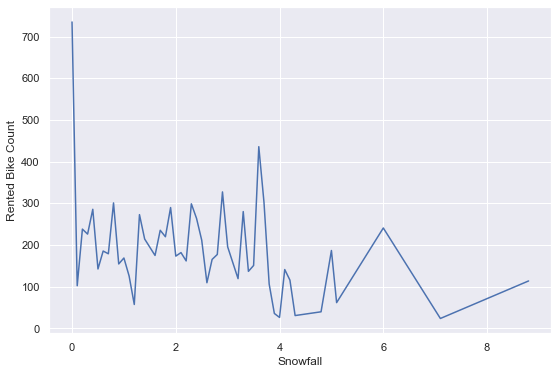

In [113]:
plt.figure(figsize=(9,6))
training_data.groupby('Snowfall')['Rented_Bike_Count'].mean ().plot()

plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')

Text(0, 0.5, 'Rented Bike Count')

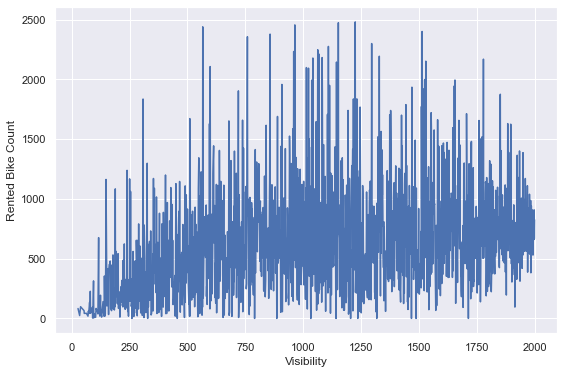

In [114]:
plt.figure(figsize=(9,6))
training_data.groupby('Visibility')['Rented_Bike_Count'].mean().plot()

plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')

Text(0, 0.5, 'Rented Bike Count')

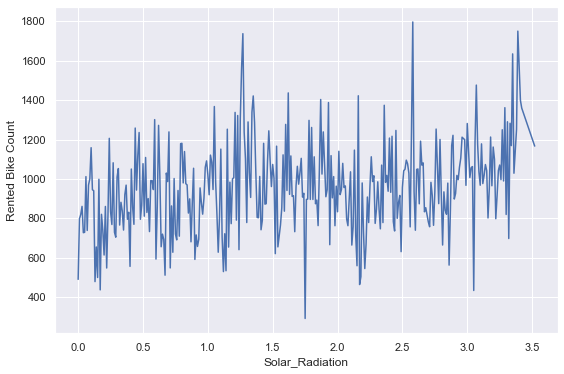

In [115]:
plt.figure(figsize=(9,6))
training_data.groupby('Solar_Radiation')['Rented_Bike_Count'].mean().plot()

plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Rented Bike Count')

**DATA PRE-PROCESSING**

In [116]:
# Transforming the Holiday variable 
Dataset['Holiday']=Dataset['Holiday'].apply(lambda x: 1 if x=='Holiday' else 0)
# Transforming the Functioning Day variable 
Dataset['Functioning_Day']=Dataset['Functioning_Day'].apply(lambda x: 1 if x=='Yes' else 0)
# Transforming the Seasons variable
from sklearn.preprocessing import OneHotEncoder
one_hot_encoded_data = pds.get_dummies(Dataset['Seasons'])
Dataset=pds.concat([Dataset,one_hot_encoded_data],axis=1)
# Take a look of dataset after coverting categorical columns
Dataset.head()


,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Autumn,Spring,Summer,Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,0,0,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,0,0,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,0,0,0,1


In [117]:
Dataset.drop('Seasons',axis=1,inplace=True)


In [118]:
Dataset.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,Autumn,Spring,Summer,Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,1


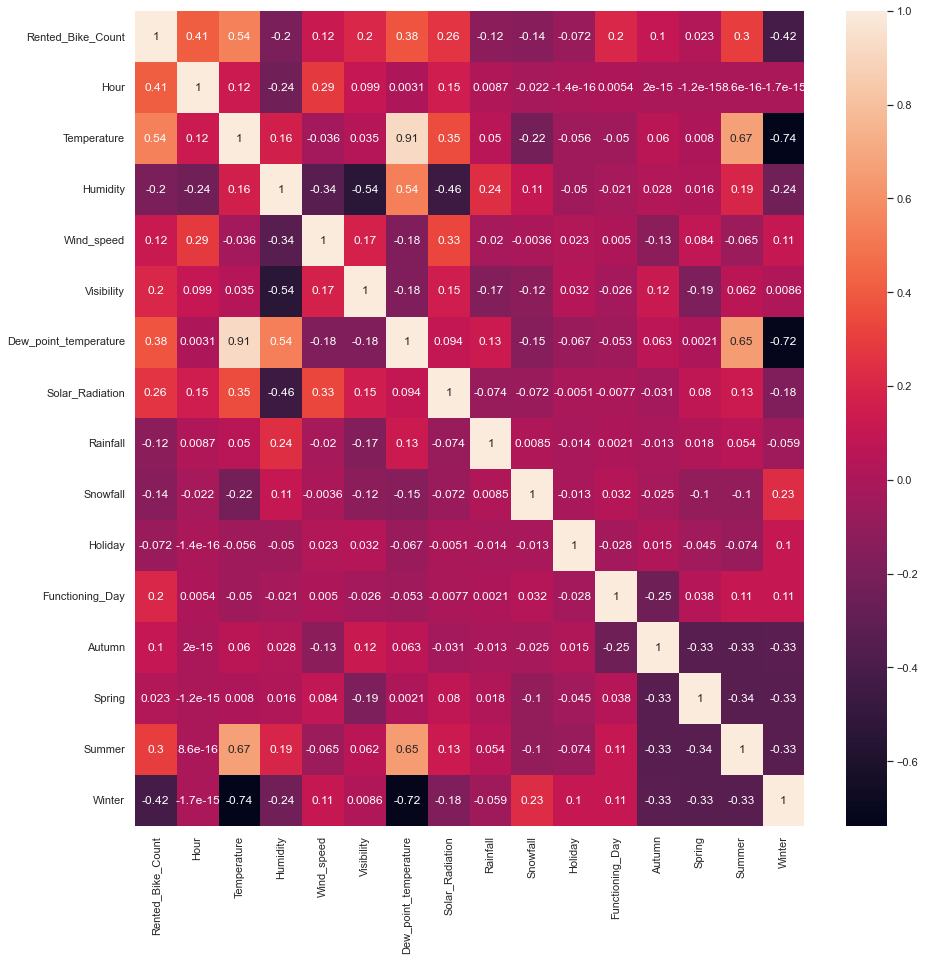

In [119]:
sns.heatmap(Dataset.corr(),annot=True)
sns.set(rc={'figure.figsize':(15,15)})